In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.16.0-rc0


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [51]:
# Reading the CSV file (Reading Dataset).

data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
# Checking The Dimensions of the Dataset
data.shape

(284807, 31)

In [53]:
# Checking of any null-values in coloumns
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [54]:
# Checking Additional Information about the Dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
#Checking in the Class coloumn the no of 1's and 0's
#0 : 284315 - Non Fraudlent Transactions.
#1 : 492 - Fraudlent Transactions.
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [56]:
# Balencing the Dataset
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

# Viewing the Dimensions of each.
non_fraud.shape , fraud.shape

((284315, 31), (492, 31))

In [57]:
# Randomly picking 492 samples from non_fraud samples to balence the Dataset.
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [58]:
#Merging the fraud and (Balenced non_fraud) datasets to get a new Balenced Dataset
data = fraud._append(non_fraud, ignore_index=True)
data['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [59]:
# Feature Space Definition
# Rows and Columns are called Features
# Feature Space is all the rows & columns needed to train the model excluding the target rows & coloumns (Here target coloums is Class)

# X has everything except class
x = data.drop('Class' , axis=1)

# Y has nothing but class
y = data['Class']

x.shape

(984, 30)

In [60]:
# Train_test_split is used to split Datasets into  trainig and testing datasets
# x - train(80%) & test(20%)
# y - train(80%) & test(20%)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

In [61]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [62]:
# As the varience is very high in the dataset we have to standardize the dataset
# varience - A measurment of how far each number is to the average of the dataset , Basically it denotes the spread of the values in Dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
#Converting Dataset into numpy array as CNN takes a 3D array as input
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [64]:
#Reshaping the x dataset to 3Dimensions
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

x_train[0].shape , x_test[0].shape

((30, 1), (30, 1))

In [65]:
#Building CNN Model
epochs = 50
model = Sequential()

#First CNN layer
model.add(Conv1D(filters=32 , kernel_size=2 , activation='relu', input_shape= x_train[0].shape))

model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

#Dropout Layer
model.add(Dropout(0.2))

#Second CNN Layer
model.add(Conv1D(filters=64 , kernel_size=2 , activation='relu'))

model.add(BatchNormalization())

model.add(MaxPool1D(pool_size=2))

#Dropout Layer
model.add(Dropout(0.3))

#Flatten Layer
model.add(Flatten())

#1st Dense Layer
model.add(Dense(units=64 , activation='relu'))

model.add(Dropout(0.3))

#2nd Dense Layer (or) Output Layer
model.add(Dense(units=1, activation='sigmoid'))



C:\Users\santh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 13, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,153 (113.88 KB)

 Non-trainable params: 192 (768.00 B)

In [67]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
history = model.fit(x_train , y_train , epochs=epochs , validation_data=(x_test , y_test) , verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5429 - loss: 0.9951 - val_accuracy: 0.7817 - val_loss: 0.6604
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6685 - loss: 0.6875 - val_accuracy: 0.8020 - val_loss: 0.6341
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7672 - loss: 0.5205 - val_accuracy: 0.7716 - val_loss: 0.6130
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7809 - loss: 0.4822 - val_accuracy: 0.7868 - val_loss: 0.5907
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8132 - loss: 0.4381 - val_accuracy: 0.8020 - val_loss: 0.5657
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8066 - loss: 0.4704 - val_accuracy: 0.8122 - val_loss: 0.5361
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8582 - loss: 0.3474 - val_accuracy: 0.8325 - val_loss: 0.5026
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8494 - loss: 0.3795 - val_accuracy: 0.8426 - val_loss

In [69]:
score = model.evaluate(x_test , y_test , verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Test Loss: 0.23491008579730988
Test Accuracy: 0.9086294174194336


In [70]:
model.save('model.h5')

In [71]:
def plot_learningCurve(history , epoch):
    # Plot training and validation accuracy values
    epoch_range = range(1 , epoch+1)
    plt.plot(epoch_range , history.history['accuracy'])
    plt.plot(epoch_range , history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train' , 'Val'], loc='upper left')
    plt.show()

    #Plot Training and validation loss values
    plt.plot(epoch_range , history.history['loss'])
    plt.plot(epoch_range , history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train' , 'Val'], loc='upper left')
    plt.show()


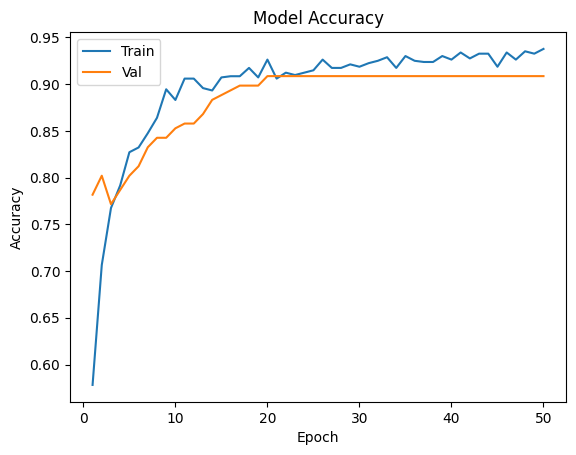

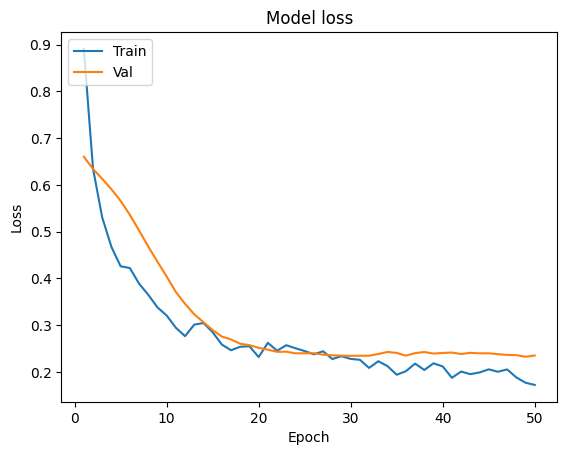

In [72]:
plot_learningCurve(history , epochs)

In [86]:
from numpy import array
Xnew = array([[-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919
]])
# print(Xnew)
predictions = model.predict(Xnew)
# print("X=%s, Predicted=%s" % (Xnew[0], predictions))
print("Predicted value ranging between 0 & 1" ,predictions)

if predictions > 0.5:
    print("Fraud Transaction")
else:
    print("Non Fraud Transaction")





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted value ranging between 0 & 1 [[0.9998313]]
Fraud Transaction
